### Import required modules

In [1]:
# manipulate arrays and have math
import numpy as np
# plot results
import matplotlib.pyplot as plt
# plot them inline in jupyter
%matplotlib inline
# make matplotlib load images
import matplotlib.image as mpimg

## Load  test images

In [2]:
sharp_image = mpimg.imread('picture.png')
soft_image = mpimg.imread('picture_gaussian_10.png')

#### Display the raw images

sharp image


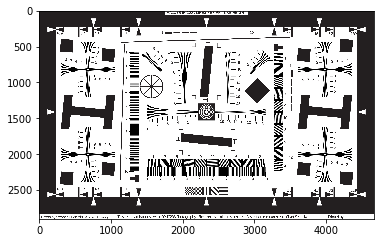

soft image


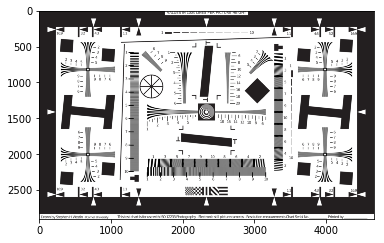

In [3]:
plt.imshow(sharp_image)
print 'sharp image'
plt.show()
plt.imshow(soft_image)
print 'soft image'
plt.show()

#### Extract smaller region from images

In [4]:
sharp_test = sharp_image[1000:1400,2000:2400].copy()
soft_test = soft_image[1000:1400,2000:2400].copy()

#### Display said regions

sharp image


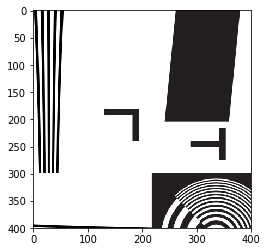

soft image


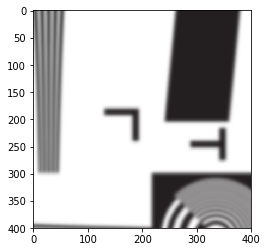

In [5]:
plt.imshow(sharp_test)
print 'sharp image'
plt.show()
plt.imshow(soft_test)
print 'soft image'
plt.show()

#### Again extract smaller region from image, now adding noise and small shift
(hoping to mimick some differences when taking pictures)

In [6]:
sharp_test_noise = sharp_image[1000:1400,2000:2400].copy()
soft_test_noise = soft_image[1005:1405,2012:2412].copy()

In [7]:
# add noise
def noise(data, noise_value):
    noisy_data = data + noise_value * np.random.random([400,400,3]) - noise_value/2
    # shift values to be within bounds
    for value in np.nditer(noisy_data, op_flags=['readwrite']):
        if (value < 0):
            value[...] = np.abs(value)
        if (value > 1):
            value[...] = -value + 2
    return noisy_data

#### Display those images

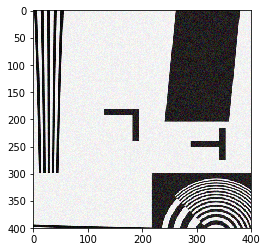

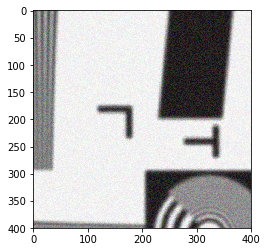

In [8]:
sharp_test_noise = noise(sharp_test_noise, 0.2)
soft_test_noise = noise(soft_test_noise, 0.2)
plt.imshow(sharp_test_noise)
plt.show()
plt.imshow(soft_test_noise)
plt.show()

## FFT test images
We use one 'colour' only, since images are grayscale anyway...

In [9]:
fft_sharp = np.fft.fft2(sharp_test[:,:,0])
fft_soft = np.fft.fft2(soft_test[:,:,0])
fft_sharp_noise = np.fft.fft2(sharp_test_noise[:,:,0])
fft_soft_noise = np.fft.fft2(soft_test_noise[:,:,0])

In [10]:
# Take 'real' to get rid of imaginary part, then take 'abs' to rid any signs.
# Finally normalise to values between 0 and 255 (or anything that displays fine), assuming this is what we plot...
def show_coefficients(fft, scaling_factor, shift):
    # convert to image values
    coefficients = np.ones([np.shape(fft)[0],np.shape(fft)[1],3])
    if (shift):
        coefficients[:,:,0] = np.abs(np.real(np.fft.fftshift(fft)))
    else:
        coefficients[:,:,0] = np.abs(np.real(fft))
    coefficients[:,:,1] = coefficients[:,:,0]
    coefficients[:,:,2] = coefficients[:,:,0]
    # with normalisation to make sense, adding scaling factor
    coefficients /= np.max(coefficients[:,:,0])
    coefficients *= scaling_factor
    plt.imshow(np.float32(coefficients[:,:,:]))
    plt.show()

### Display coefficients of exact images

sharp image frequencies


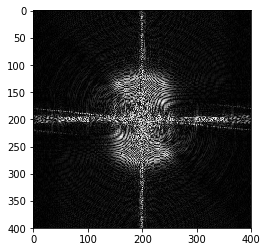

soft image frequencies


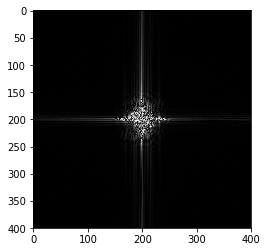

In [11]:
print 'sharp image frequencies'
show_coefficients(fft_sharp, 600, True)
print 'soft image frequencies'
show_coefficients(fft_soft, 600, True)

### Sharpness metric of exact images

In [12]:
def fft_sharpness_metric(fft, fraction):
    metric = 0.0
    # reformat fft values, this includes shifing zeroth order to center
    fft_usable = np.abs(np.real(np.fft.fftshift(fft)))
    fft_usable /= np.max(fft_usable)
    # find center of frequencies
    center_x = np.shape(fft_sharp_noise)[0]/2
    center_y = np.shape(fft_sharp_noise)[1]/2
    region_x_min = np.int(center_x - fraction*center_x)
    region_x_max = np.int(center_x + fraction*center_x)
    region_y_min = np.int(center_y - fraction*center_y)
    region_y_max = np.int(center_y + fraction*center_y)
    # loop from center outwards, a fraction of frequencies
    for value in np.nditer(fft_usable[region_x_min:region_x_max, region_y_min:region_y_max]):
        metric += np.sqrt(value)
    return metric

In [13]:
print 'Testing different cut-offs for the frequencies taken into account'
for frac in [0.1, 0.2, 0.4, 0.6, 0.8]:
    print 'fraction of frequencies:', frac
    print '    metric (sharp) :', fft_sharpness_metric(fft_sharp, frac)
    print '    metric  (soft) :', fft_sharpness_metric(fft_soft, frac)

Testing different cut-offs for the frequencies taken into account
fraction of frequencies: 0.1
    metric (sharp) : 75.3405700802
    metric  (soft) : 66.9675107324
fraction of frequencies: 0.2
    metric (sharp) : 204.898502798
    metric  (soft) : 133.145029462
fraction of frequencies: 0.4
    metric (sharp) : 581.212115514
    metric  (soft) : 225.358825803
fraction of frequencies: 0.6
    metric (sharp) : 904.759958165
    metric  (soft) : 314.150948575
fraction of frequencies: 0.8
    metric (sharp) : 1265.80745082
    metric  (soft) : 406.363714917


### Display coefficients of more realistic images

sharp image frequencies


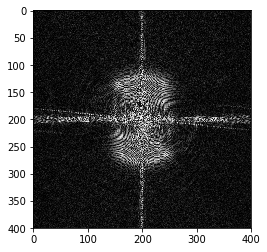

soft image frequencies


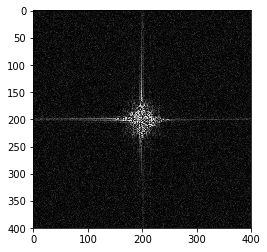

In [14]:
print 'sharp image frequencies'
show_coefficients(fft_sharp_noise, 600, True)
print 'soft image frequencies'
show_coefficients(fft_soft_noise, 600, True)

### Sharpness metric of more realistic images

In [15]:
print 'Testing different cut-offs for the frequencies taken into account'
for frac in [0.1, 0.2, 0.4, 0.6, 0.8]:
    print 'fraction of frequencies:', frac
    print '    metric (sharp) :', fft_sharpness_metric(fft_sharp_noise, frac)
    print '    metric  (soft) :', fft_sharpness_metric(fft_soft_noise, frac)

Testing different cut-offs for the frequencies taken into account
fraction of frequencies: 0.1
    metric (sharp) : 74.7657437092
    metric  (soft) : 67.2748908273
fraction of frequencies: 0.2
    metric (sharp) : 203.246694466
    metric  (soft) : 140.781539734
fraction of frequencies: 0.4
    metric (sharp) : 583.976051541
    metric  (soft) : 322.490394101
fraction of frequencies: 0.6
    metric (sharp) : 946.053191441
    metric  (soft) : 606.979875539
fraction of frequencies: 0.8
    metric (sharp) : 1387.34288239
    metric  (soft) : 998.316239116


### Sharpness metric for all images

In [16]:
print 'Testing different cut-offs for the frequencies taken into account'
for frac in [0.1, 0.2, 0.4, 0.6, 0.8]:
    print 'fraction of frequencies:', frac
    print '    metric (sharp exact/noisy) :', fft_sharpness_metric(fft_sharp, frac), fft_sharpness_metric(fft_sharp_noise, frac)
    print '    metric  (soft exact/noisy) :', fft_sharpness_metric(fft_soft, frac), fft_sharpness_metric(fft_soft_noise, frac)

Testing different cut-offs for the frequencies taken into account
fraction of frequencies: 0.1
    metric (sharp exact/noisy) : 75.3405700802 74.7657437092
    metric  (soft exact/noisy) : 66.9675107324 67.2748908273
fraction of frequencies: 0.2
    metric (sharp exact/noisy) : 204.898502798 203.246694466
    metric  (soft exact/noisy) : 133.145029462 140.781539734
fraction of frequencies: 0.4
    metric (sharp exact/noisy) : 581.212115514 583.976051541
    metric  (soft exact/noisy) : 225.358825803 322.490394101
fraction of frequencies: 0.6
    metric (sharp exact/noisy) : 904.759958165 946.053191441
    metric  (soft exact/noisy) : 314.150948575 606.979875539
fraction of frequencies: 0.8
    metric (sharp exact/noisy) : 1265.80745082 1387.34288239
    metric  (soft exact/noisy) : 406.363714917 998.316239116


### Check robustness of metric, looking at the ratio of things
A higher ratio should hint towards a clearer identification (or so the idea)

In [19]:
for frac in [0.1, 0.2, 0.4, 0.6, 0.8]:
    print '    ratio/cleanliness of results:', \
    1/(fft_sharpness_metric(sharp_test_noise, frac)/fft_sharpness_metric(soft_test_noise, frac))

    ratio/cleanliness of results: 1.08968506787
    ratio/cleanliness of results: 1.13677170724
    ratio/cleanliness of results: 1.10208738575
    ratio/cleanliness of results: 1.06881867396
    ratio/cleanliness of results: 1.04161642686
